# Power Quality Analyser And Prediction

**This Notebook is going to analyse the power quality under different readings provided by the dataset from Kaggle.com**

Rigorous analysis of the dataset will fetch the correlation between the incomming *Power Quality* and the meter readings of the insturments implemneted for preparing this dataset

In [1]:
import pandas as pd

This specific module is imported to ciritcally study the relations between the different features in this dataset and filter out the best key value players needed to provide a reasonable accurate model to predict the *Power Quality*

In [2]:
df=pd.read_csv("power-quality-meter.csv")

Let us look through the diffferent features involved in this dataset

In [3]:
df.columns

Index(['Unnamed: 0', 'Date', 'Time', 'Vrms ph-n AN Avg', 'Vrms ph-n BN Avg',
       'Vrms ph-n CN Avg', 'Vrms ph-n NG Avg', 'Current A Avg',
       'Current B Avg', 'Current C Avg', 'Current Phi AN Avg',
       'Current Phi BN Avg', 'Current Phi CN Avg', 'Active Power Total Avg',
       'Apparent Power Total Avg', 'Reactive Power Total Avg',
       'Cos Phi AN Avg', 'Cos Phi BN Avg', 'Cos Phi CN Avg',
       'Cos Phi Total Avg'],
      dtype='object')

Here we can visualise different features involed along with the power quality columns.Our job is to statistically analyse the involvement of each and every features in the dataset and its effect over the *Power Quality*

Let us look at some of the datas

In [4]:
df.head()

,Unnamed: 0,Date,Time,Vrms ph-n AN Avg,Vrms ph-n BN Avg,Vrms ph-n CN Avg,Vrms ph-n NG Avg,Current A Avg,Current B Avg,Current C Avg,Current Phi AN Avg,Current Phi BN Avg,Current Phi CN Avg,Active Power Total Avg,Apparent Power Total Avg,Reactive Power Total Avg,Cos Phi AN Avg,Cos Phi BN Avg,Cos Phi CN Avg,Cos Phi Total Avg
0,0,2019-08-31,3:21:43 PM.135,242.58,241.98,242.12,0.46,596.0,544.7,496.3,-7.74,-135.90,-248.54,389550,397650,73050,0.99,0.96,0.99,0.98
1,1,2019-08-31,3:22:13 PM.135,242.98,242.34,242.72,0.48,612.5,541.1,494.8,-18.12,-129.90,-240.30,397800,401550,26400,1.00,0.98,1.00,1.00
2,2,2019-08-31,3:22:43 PM.135,243.04,242.18,242.78,0.54,628.3,558.3,508.8,-291.90,-128.06,-238.58,408300,412950,13500,1.00,0.99,1.00,1.00
3,3,2019-08-31,3:23:13 PM.135,242.92,242.06,242.70,0.56,640.2,562.5,510.5,-359.42,-128.70,-238.82,412050,417300,16350,1.00,0.99,1.00,1.00
4,4,2019-08-31,3:23:43 PM.135,242.52,241.62,242.20,0.54,652.7,587.6,533.5,-167.08,-130.62,-242.02,424650,430650,35100,1.00,0.98,1.00,1.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2343 non-null   int64  
 1   Date                      2343 non-null   object 
 2   Time                      2343 non-null   object 
 3   Vrms ph-n AN Avg          2343 non-null   float64
 4   Vrms ph-n BN Avg          2343 non-null   float64
 5   Vrms ph-n CN Avg          2343 non-null   float64
 6   Vrms ph-n NG Avg          2343 non-null   float64
 7   Current A Avg             2343 non-null   float64
 8   Current B Avg             2343 non-null   float64
 9   Current C Avg             2343 non-null   float64
 10  Current Phi AN Avg        2343 non-null   float64
 11  Current Phi BN Avg        2343 non-null   float64
 12  Current Phi CN Avg        2343 non-null   float64
 13  Active Power Total Avg    2343 non-null   int64  
 14  Apparent

From the above output we can infer that feature 'Date' and 'Time' are as object type rest of them are numerical data types.

**Surprisingly there are no null values in this data set.Hence, we don't need to work over any missing datas**

In [6]:
df.shape

(2343, 20)

There are total 20 features and 2343 entries of data.

# Let us Look At Some Statistical Information About This Dataset

In [7]:
df.describe()

,Unnamed: 0,Vrms ph-n AN Avg,Vrms ph-n BN Avg,Vrms ph-n CN Avg,Vrms ph-n NG Avg,Current A Avg,Current B Avg,Current C Avg,Current Phi AN Avg,Current Phi BN Avg,Current Phi CN Avg,Active Power Total Avg,Apparent Power Total Avg,Reactive Power Total Avg,Cos Phi AN Avg,Cos Phi BN Avg,Cos Phi CN Avg,Cos Phi Total Avg
count,2343.000000,2343.000000,2343.000000,2343.000000,2343.000000,2343.000000,2343.000000,2343.000000,2343.000000,2343.000000,2343.000000,2.343000e+03,2.343000e+03,2.343000e+03,2343.000000,2343.000000,2343.000000,2343.000000
mean,1171.000000,243.279582,242.855408,243.190141,0.641682,738.984336,680.937345,623.053521,-69.715023,-129.926359,-242.593419,4.986844e+05,5.071369e+05,5.431069e+04,1.130226,1.392885,0.989351,1.545262
std,676.510163,21.222101,21.221081,21.244390,0.107971,176.188660,239.494361,130.347417,116.917071,28.602276,6.509653,2.063643e+05,2.070221e+05,2.025362e+05,6.749498,11.685405,0.086204,13.489638
min,0.000000,0.200000,0.020000,0.060000,0.120000,0.100000,0.100000,0.100000,-359.560000,-200.200000,-258.340000,0.000000e+00,0.000000e+00,-4.605000e+04,0.000000,0.000000,0.000000,0.000000
25%,585.500000,242.900000,242.420000,242.870000,0.560000,665.000000,593.700000,545.350000,-94.140000,-132.160000,-245.440000,4.341750e+05,4.407000e+05,2.775000e+04,1.000000,0.980000,0.990000,0.990000
50%,1171.000000,244.400000,244.000000,244.500000,0.640000,756.800000,699.300000,647.400000,-4.980000,-130.180000,-242.860000,5.091000e+05,5.178000e+05,4.245000e+04,1.000000,0.980000,1.000000,1.000000
75%,1756.500000,247.400000,247.060000,247.090000,0.720000,840.300000,777.550000,729.700000,-2.600000,-128.820000,-240.920000,5.677500e+05,5.775000e+05,6.322500e+04,1.000000,0.990000,1.000000,1.000000
max,2342.000000,253.660000,254.780000,253.160000,1.040000,6276.700000,6276.700000,835.300000,655.340000,655.340000,-168.580000,4.915050e+06,4.915050e+06,4.915050e+06,327.670000,327.670000,1.000000,327.670000


## Conclusion Form The Above Statistical Insight:

1.Feature Named "Unnamed: 0" has no effect over the measurement of rms voltage values of different phases (Vrms ph-n) and current average (Current Avg), active total power average, reactive power total average, Current Phi Average and cos Phi Average of different phases.

2. Mean Value of different measurements are generated.

3. Minimum values of every features are shown.
   

From this, we can estimated the minimum value the power quality can reach.That proves power quality can detoriate based on the reading of the other features.

4. Maximum values of every features are also shown as well

If we look at the Maximum Power Quality Value it seems quite peculiar. Cosine value of any angle exists in the range between [-1,1].Here **max** row cosine value of several features is 327.670000. Which states this is a misleading data. 

Due to this, the standard deviation of datas are affected especially the cos phi feature.

We, can't assume other values in the **max** row other than the cos phi are irrelevant. So, either we can replace the suspicious entry on cos phi with mean value or remove that set of row, for simplicity we choose the second option here.

In [8]:
df.sort_values(by='Cos Phi Total Avg',ascending=False)


,Unnamed: 0,Date,Time,Vrms ph-n AN Avg,Vrms ph-n BN Avg,Vrms ph-n CN Avg,Vrms ph-n NG Avg,Current A Avg,Current B Avg,Current C Avg,Current Phi AN Avg,Current Phi BN Avg,Current Phi CN Avg,Active Power Total Avg,Apparent Power Total Avg,Reactive Power Total Avg,Cos Phi AN Avg,Cos Phi BN Avg,Cos Phi CN Avg,Cos Phi Total Avg
2307,2307,2019-09-01,10:35:13 AM.135,239.98,240.04,240.14,0.48,6276.7,706.1,675.1,655.34,-130.98,-247.72,4915050,4915050,4915050,327.67,0.98,0.99,327.67
1973,1973,2019-09-01,7:48:13 AM.135,245.14,244.70,245.16,0.54,555.9,6276.7,435.6,-123.14,655.34,-244.20,4915050,4915050,4915050,1.00,327.67,0.99,327.67
289,289,2019-08-31,5:46:13 PM.135,245.40,244.86,244.72,0.62,523.1,6276.7,413.9,-133.06,655.34,-243.62,4915050,4915050,4915050,0.99,327.67,0.99,327.67
1919,1919,2019-09-01,7:21:13 AM.135,245.72,245.38,246.30,0.70,554.2,6276.7,427.6,-300.04,655.34,-234.88,4915050,4915050,4915050,1.00,327.67,0.99,327.67
954,954,2019-08-31,11:18:43 PM.135,244.96,245.00,245.32,0.60,788.2,720.7,668.8,-1.90,-129.40,-242.82,530700,534900,42900,1.00,0.99,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,1035,2019-08-31,11:59:13 PM.135,0.22,0.02,0.06,0.12,0.1,0.1,0.1,-171.04,-179.22,-183.84,0,0,0,0.00,0.00,0.00,0.00
1034,1034,2019-08-31,11:58:43 PM.135,0.22,0.02,0.06,0.12,0.1,0.1,0.1,-168.52,-177.72,-171.48,0,0,0,0.00,0.00,0.00,0.00
1029,1029,2019-08-31,11:56:13 PM.135,0.20,0.02,0.06,0.12,0.1,0.1,0.1,-176.34,-180.18,-193.22,0,0,0,0.00,0.00,0.00,0.00
1033,1033,2019-08-31,11:58:13 PM.135,0.22,0.02,0.06,0.12,0.1,0.1,0.1,-183.76,-174.90,-179.74,0,0,0,0.00,0.00,0.00,0.00


**Not only One peculiar cos phi reading but sorting this data frame in descending order reveals that there are more than one noisy data entries. We are going to drop these noisy data entries to make our dataset clean**

In [9]:
df.drop([2307,1973,289,1919],axis=0)

,Unnamed: 0,Date,Time,Vrms ph-n AN Avg,Vrms ph-n BN Avg,Vrms ph-n CN Avg,Vrms ph-n NG Avg,Current A Avg,Current B Avg,Current C Avg,Current Phi AN Avg,Current Phi BN Avg,Current Phi CN Avg,Active Power Total Avg,Apparent Power Total Avg,Reactive Power Total Avg,Cos Phi AN Avg,Cos Phi BN Avg,Cos Phi CN Avg,Cos Phi Total Avg
0,0,2019-08-31,3:21:43 PM.135,242.58,241.98,242.12,0.46,596.0,544.7,496.3,-7.74,-135.90,-248.54,389550,397650,73050,0.99,0.96,0.99,0.98
1,1,2019-08-31,3:22:13 PM.135,242.98,242.34,242.72,0.48,612.5,541.1,494.8,-18.12,-129.90,-240.30,397800,401550,26400,1.00,0.98,1.00,1.00
2,2,2019-08-31,3:22:43 PM.135,243.04,242.18,242.78,0.54,628.3,558.3,508.8,-291.90,-128.06,-238.58,408300,412950,13500,1.00,0.99,1.00,1.00
3,3,2019-08-31,3:23:13 PM.135,242.92,242.06,242.70,0.56,640.2,562.5,510.5,-359.42,-128.70,-238.82,412050,417300,16350,1.00,0.99,1.00,1.00
4,4,2019-08-31,3:23:43 PM.135,242.52,241.62,242.20,0.54,652.7,587.6,533.5,-167.08,-130.62,-242.02,424650,430650,35100,1.00,0.98,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338,2338,2019-09-01,10:50:43 AM.135,241.32,240.62,241.36,0.76,564.4,513.3,458.6,-309.16,-129.78,-240.90,364800,371700,21600,1.00,0.99,1.00,1.00
2339,2339,2019-09-01,10:51:13 AM.135,241.44,240.66,241.42,0.76,559.6,511.8,458.0,-354.38,-129.52,-240.76,363300,370050,19800,1.00,0.99,1.00,1.00
2340,2340,2019-09-01,10:51:43 AM.135,241.16,240.36,241.14,0.76,573.6,519.6,464.9,-178.76,-130.10,-241.38,369600,376650,24450,1.00,0.98,1.00,1.00
2341,2341,2019-09-01,10:52:13 AM.135,240.42,240.08,240.08,0.54,546.1,524.2,482.9,-29.26,-131.02,-247.52,369150,373500,50700,1.00,0.98,0.99,0.99


**Sucessfully these 4 noisy data entries are removed for the dataset. Now, let us update the dataset**

In [10]:
df.drop([2307,1973,289,1919],axis=0,inplace=True)

*Now let us check the maximum values of the updated dataset by sorting in descending order*

In [11]:
df.sort_values(by='Cos Phi Total Avg',ascending=False)

,Unnamed: 0,Date,Time,Vrms ph-n AN Avg,Vrms ph-n BN Avg,Vrms ph-n CN Avg,Vrms ph-n NG Avg,Current A Avg,Current B Avg,Current C Avg,Current Phi AN Avg,Current Phi BN Avg,Current Phi CN Avg,Active Power Total Avg,Apparent Power Total Avg,Reactive Power Total Avg,Cos Phi AN Avg,Cos Phi BN Avg,Cos Phi CN Avg,Cos Phi Total Avg
791,791,2019-08-31,9:57:13 PM.135,242.76,242.56,242.96,0.56,865.7,795.9,743.8,-1.46,-128.54,-242.22,581700,585000,40650,1.0,0.99,1.0,1.0
940,940,2019-08-31,11:11:43 PM.135,243.96,243.82,244.42,0.60,902.6,842.2,777.8,-2.34,-129.72,-244.08,612450,616800,57000,1.0,0.99,1.0,1.0
2135,2135,2019-09-01,9:09:13 AM.135,243.96,243.32,244.32,0.58,742.8,673.4,620.6,-316.78,-127.58,-239.62,493950,498000,19800,1.0,0.99,1.0,1.0
959,959,2019-08-31,11:21:13 PM.135,245.22,245.14,245.50,0.58,804.7,746.2,689.0,-2.60,-130.32,-244.00,545700,550500,53100,1.0,0.98,1.0,1.0
958,958,2019-08-31,11:20:43 PM.135,244.98,244.94,245.30,0.58,809.4,749.4,692.8,-2.74,-130.44,-244.20,548100,552900,54750,1.0,0.98,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,1035,2019-08-31,11:59:13 PM.135,0.22,0.02,0.06,0.12,0.1,0.1,0.1,-171.04,-179.22,-183.84,0,0,0,0.0,0.00,0.0,0.0
1034,1034,2019-08-31,11:58:43 PM.135,0.22,0.02,0.06,0.12,0.1,0.1,0.1,-168.52,-177.72,-171.48,0,0,0,0.0,0.00,0.0,0.0
1030,1030,2019-08-31,11:56:43 PM.135,0.22,0.02,0.06,0.12,0.1,0.1,0.1,-183.78,-170.58,-168.58,0,0,0,0.0,0.00,0.0,0.0
1033,1033,2019-08-31,11:58:13 PM.135,0.22,0.02,0.06,0.12,0.1,0.1,0.1,-183.76,-174.90,-179.74,0,0,0,0.0,0.00,0.0,0.0


**Now the dataset is filtered from noisy data, we will look over the statistical description of this updated dataset**

In [12]:
df.describe()

,Unnamed: 0,Vrms ph-n AN Avg,Vrms ph-n BN Avg,Vrms ph-n CN Avg,Vrms ph-n NG Avg,Current A Avg,Current B Avg,Current C Avg,Current Phi AN Avg,Current Phi BN Avg,Current Phi CN Avg,Active Power Total Avg,Apparent Power Total Avg,Reactive Power Total Avg,Cos Phi AN Avg,Cos Phi BN Avg,Cos Phi CN Avg,Cos Phi Total Avg
count,2339.00000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000
mean,1170.22873,243.278247,242.853886,243.188619,0.641779,736.866353,673.749466,623.284395,-69.876614,-130.933091,-242.593399,491131.808465,499598.824284,45998.182984,0.990791,0.974579,0.989350,0.987546
std,676.05421,21.239997,21.239007,21.262302,0.107984,133.886986,131.244327,130.262143,115.941721,5.218322,6.512284,96087.720870,98148.125068,24489.941545,0.087124,0.085994,0.086278,0.086783
min,0.00000,0.200000,0.020000,0.060000,0.120000,0.100000,0.100000,0.100000,-359.560000,-200.200000,-258.340000,0.000000,0.000000,-46050.000000,0.000000,0.000000,0.000000,0.000000
25%,585.50000,242.900000,242.420000,242.870000,0.560000,665.300000,593.700000,545.900000,-91.100000,-132.160000,-245.440000,434025.000000,440550.000000,27675.000000,1.000000,0.980000,1.000000,0.990000
50%,1170.00000,244.400000,244.000000,244.500000,0.640000,756.800000,699.000000,647.400000,-4.980000,-130.180000,-242.840000,508950.000000,517800.000000,42450.000000,1.000000,0.980000,1.000000,1.000000
75%,1754.50000,247.410000,247.060000,247.100000,0.720000,840.300000,777.450000,729.950000,-2.600000,-128.820000,-240.920000,567525.000000,577350.000000,63000.000000,1.000000,0.990000,1.000000,1.000000
max,2342.00000,253.660000,254.780000,253.160000,1.040000,951.800000,894.000000,835.300000,-0.360000,-63.220000,-168.580000,644550.000000,663450.000000,163200.000000,1.000000,1.000000,1.000000,1.000000


# Reinspection of the Statistical Values

**The dataset yeilds cleaner satistical insight.Hence, we see the maxium value of POWER QUALITY as cos phi is now 1.Therefore, we achieved a mathematically promising result**

From 25% section we can infer that among total reading about 25% cases aare there where the power quality got detoriated to value 0.9.


And from 75% section, we can say there were 75% cases where power quality was good which was value 1.

# Dropping The Unnecessary Features

**In the above dataset we filtered out the noisy data but it would be an efficient move to remove the unwanted features which do not conrtibute to the estimation of power quality. These are "Unnamed: 0" ,"Date","Time".**

In [13]:
df.drop(["Unnamed: 0" ,"Date","Time"],axis=1,inplace=True)

In [14]:
df.head()

,Vrms ph-n AN Avg,Vrms ph-n BN Avg,Vrms ph-n CN Avg,Vrms ph-n NG Avg,Current A Avg,Current B Avg,Current C Avg,Current Phi AN Avg,Current Phi BN Avg,Current Phi CN Avg,Active Power Total Avg,Apparent Power Total Avg,Reactive Power Total Avg,Cos Phi AN Avg,Cos Phi BN Avg,Cos Phi CN Avg,Cos Phi Total Avg
0,242.58,241.98,242.12,0.46,596.0,544.7,496.3,-7.74,-135.90,-248.54,389550,397650,73050,0.99,0.96,0.99,0.98
1,242.98,242.34,242.72,0.48,612.5,541.1,494.8,-18.12,-129.90,-240.30,397800,401550,26400,1.00,0.98,1.00,1.00
2,243.04,242.18,242.78,0.54,628.3,558.3,508.8,-291.90,-128.06,-238.58,408300,412950,13500,1.00,0.99,1.00,1.00
3,242.92,242.06,242.70,0.56,640.2,562.5,510.5,-359.42,-128.70,-238.82,412050,417300,16350,1.00,0.99,1.00,1.00
4,242.52,241.62,242.20,0.54,652.7,587.6,533.5,-167.08,-130.62,-242.02,424650,430650,35100,1.00,0.98,1.00,1.00


**Now this Dataset looks pretty promising to put this into a Decision Tree Regression model for training and testing purpose**

# Dataset Cleaning Done

We can say that, this dataset is filled with porper values only as we have filtered out the unnecessary features.Closer inspection of this dataset concludes us that flitered dataset has numerical datatypes with uniqune entries.So, there is no need of implementation of Encoding procedures like *One Hot Endcoding* or *Ordinal Encoding*

# Let Us Save This Dataset 

We will save this dataset with a name final_dataset.

In [15]:
final_dataset=df

In [16]:
final_dataset.head()

,Vrms ph-n AN Avg,Vrms ph-n BN Avg,Vrms ph-n CN Avg,Vrms ph-n NG Avg,Current A Avg,Current B Avg,Current C Avg,Current Phi AN Avg,Current Phi BN Avg,Current Phi CN Avg,Active Power Total Avg,Apparent Power Total Avg,Reactive Power Total Avg,Cos Phi AN Avg,Cos Phi BN Avg,Cos Phi CN Avg,Cos Phi Total Avg
0,242.58,241.98,242.12,0.46,596.0,544.7,496.3,-7.74,-135.90,-248.54,389550,397650,73050,0.99,0.96,0.99,0.98
1,242.98,242.34,242.72,0.48,612.5,541.1,494.8,-18.12,-129.90,-240.30,397800,401550,26400,1.00,0.98,1.00,1.00
2,243.04,242.18,242.78,0.54,628.3,558.3,508.8,-291.90,-128.06,-238.58,408300,412950,13500,1.00,0.99,1.00,1.00
3,242.92,242.06,242.70,0.56,640.2,562.5,510.5,-359.42,-128.70,-238.82,412050,417300,16350,1.00,0.99,1.00,1.00
4,242.52,241.62,242.20,0.54,652.7,587.6,533.5,-167.08,-130.62,-242.02,424650,430650,35100,1.00,0.98,1.00,1.00


**Pretty Satisfactory!!**

# Correlation Insight

**See, there are so many entries in each of the rows.Before putting this dataset into a Machine Learning model.We need check the correlation among these features and see if any feature doesn't provide huge impact on the correlation.Then we can skim off those unwanted features as well to make the dataset even more cleaner.**

In [17]:
final_dataset.corr()

,Vrms ph-n AN Avg,Vrms ph-n BN Avg,Vrms ph-n CN Avg,Vrms ph-n NG Avg,Current A Avg,Current B Avg,Current C Avg,Current Phi AN Avg,Current Phi BN Avg,Current Phi CN Avg,Active Power Total Avg,Apparent Power Total Avg,Reactive Power Total Avg,Cos Phi AN Avg,Cos Phi BN Avg,Cos Phi CN Avg,Cos Phi Total Avg
Vrms ph-n AN Avg,1.000000,0.999865,0.999572,0.496628,0.500466,0.468231,0.438470,0.109177,0.796564,-0.806500,0.474608,0.477737,0.219123,0.962117,0.956971,0.965776,0.959968
Vrms ph-n BN Avg,0.999865,1.000000,0.999766,0.498957,0.500899,0.468910,0.439762,0.111358,0.794798,-0.807507,0.475565,0.478971,0.223996,0.960496,0.955312,0.964162,0.958244
Vrms ph-n CN Avg,0.999572,0.999766,1.000000,0.497030,0.500008,0.467384,0.438619,0.106115,0.799069,-0.802601,0.474650,0.477676,0.214666,0.961544,0.956863,0.965304,0.959642
Vrms ph-n NG Avg,0.496628,0.498957,0.497030,1.000000,0.533826,0.507075,0.511627,0.164984,0.325285,-0.427101,0.527003,0.550832,0.337726,0.432786,0.433363,0.425535,0.422260
Current A Avg,0.500466,0.500899,0.500008,0.533826,1.000000,0.994449,0.988120,0.411518,0.490953,-0.569359,0.996549,0.994504,0.474092,0.502086,0.528659,0.499654,0.496097
Current B Avg,0.468231,0.468910,0.467384,0.507075,0.994449,1.000000,0.994598,0.433869,0.451405,-0.575689,0.997371,0.996025,0.518398,0.466279,0.492599,0.463536,0.459444
Current C Avg,0.438470,0.439762,0.438619,0.511627,0.988120,0.994598,1.000000,0.438942,0.437826,-0.554183,0.993937,0.993845,0.526390,0.432553,0.462863,0.430212,0.426649
Current Phi AN Avg,0.109177,0.111358,0.106115,0.164984,0.411518,0.433869,0.438942,1.000000,-0.102893,-0.405965,0.423195,0.432997,0.630437,0.088066,0.066384,0.082730,0.068479
Current Phi BN Avg,0.796564,0.794798,0.799069,0.325285,0.490953,0.451405,0.437826,-0.102893,1.000000,-0.417356,0.465698,0.450920,-0.169306,0.761946,0.799637,0.778172,0.776392
Current Phi CN Avg,-0.806500,-0.807507,-0.802601,-0.427101,-0.569359,-0.575689,-0.554183,-0.405965,-0.417356,1.000000,-0.563112,-0.574149,-0.643248,-0.794306,-0.770557,-0.782286,-0.775003


**A graphical representation of this correlation would be more promising.Otherwise,it is hard to comprehend whats gonig on.**

We are going to use **Seaborn Module** to render this correlation in graphical format.

In [19]:
import seaborn as sns

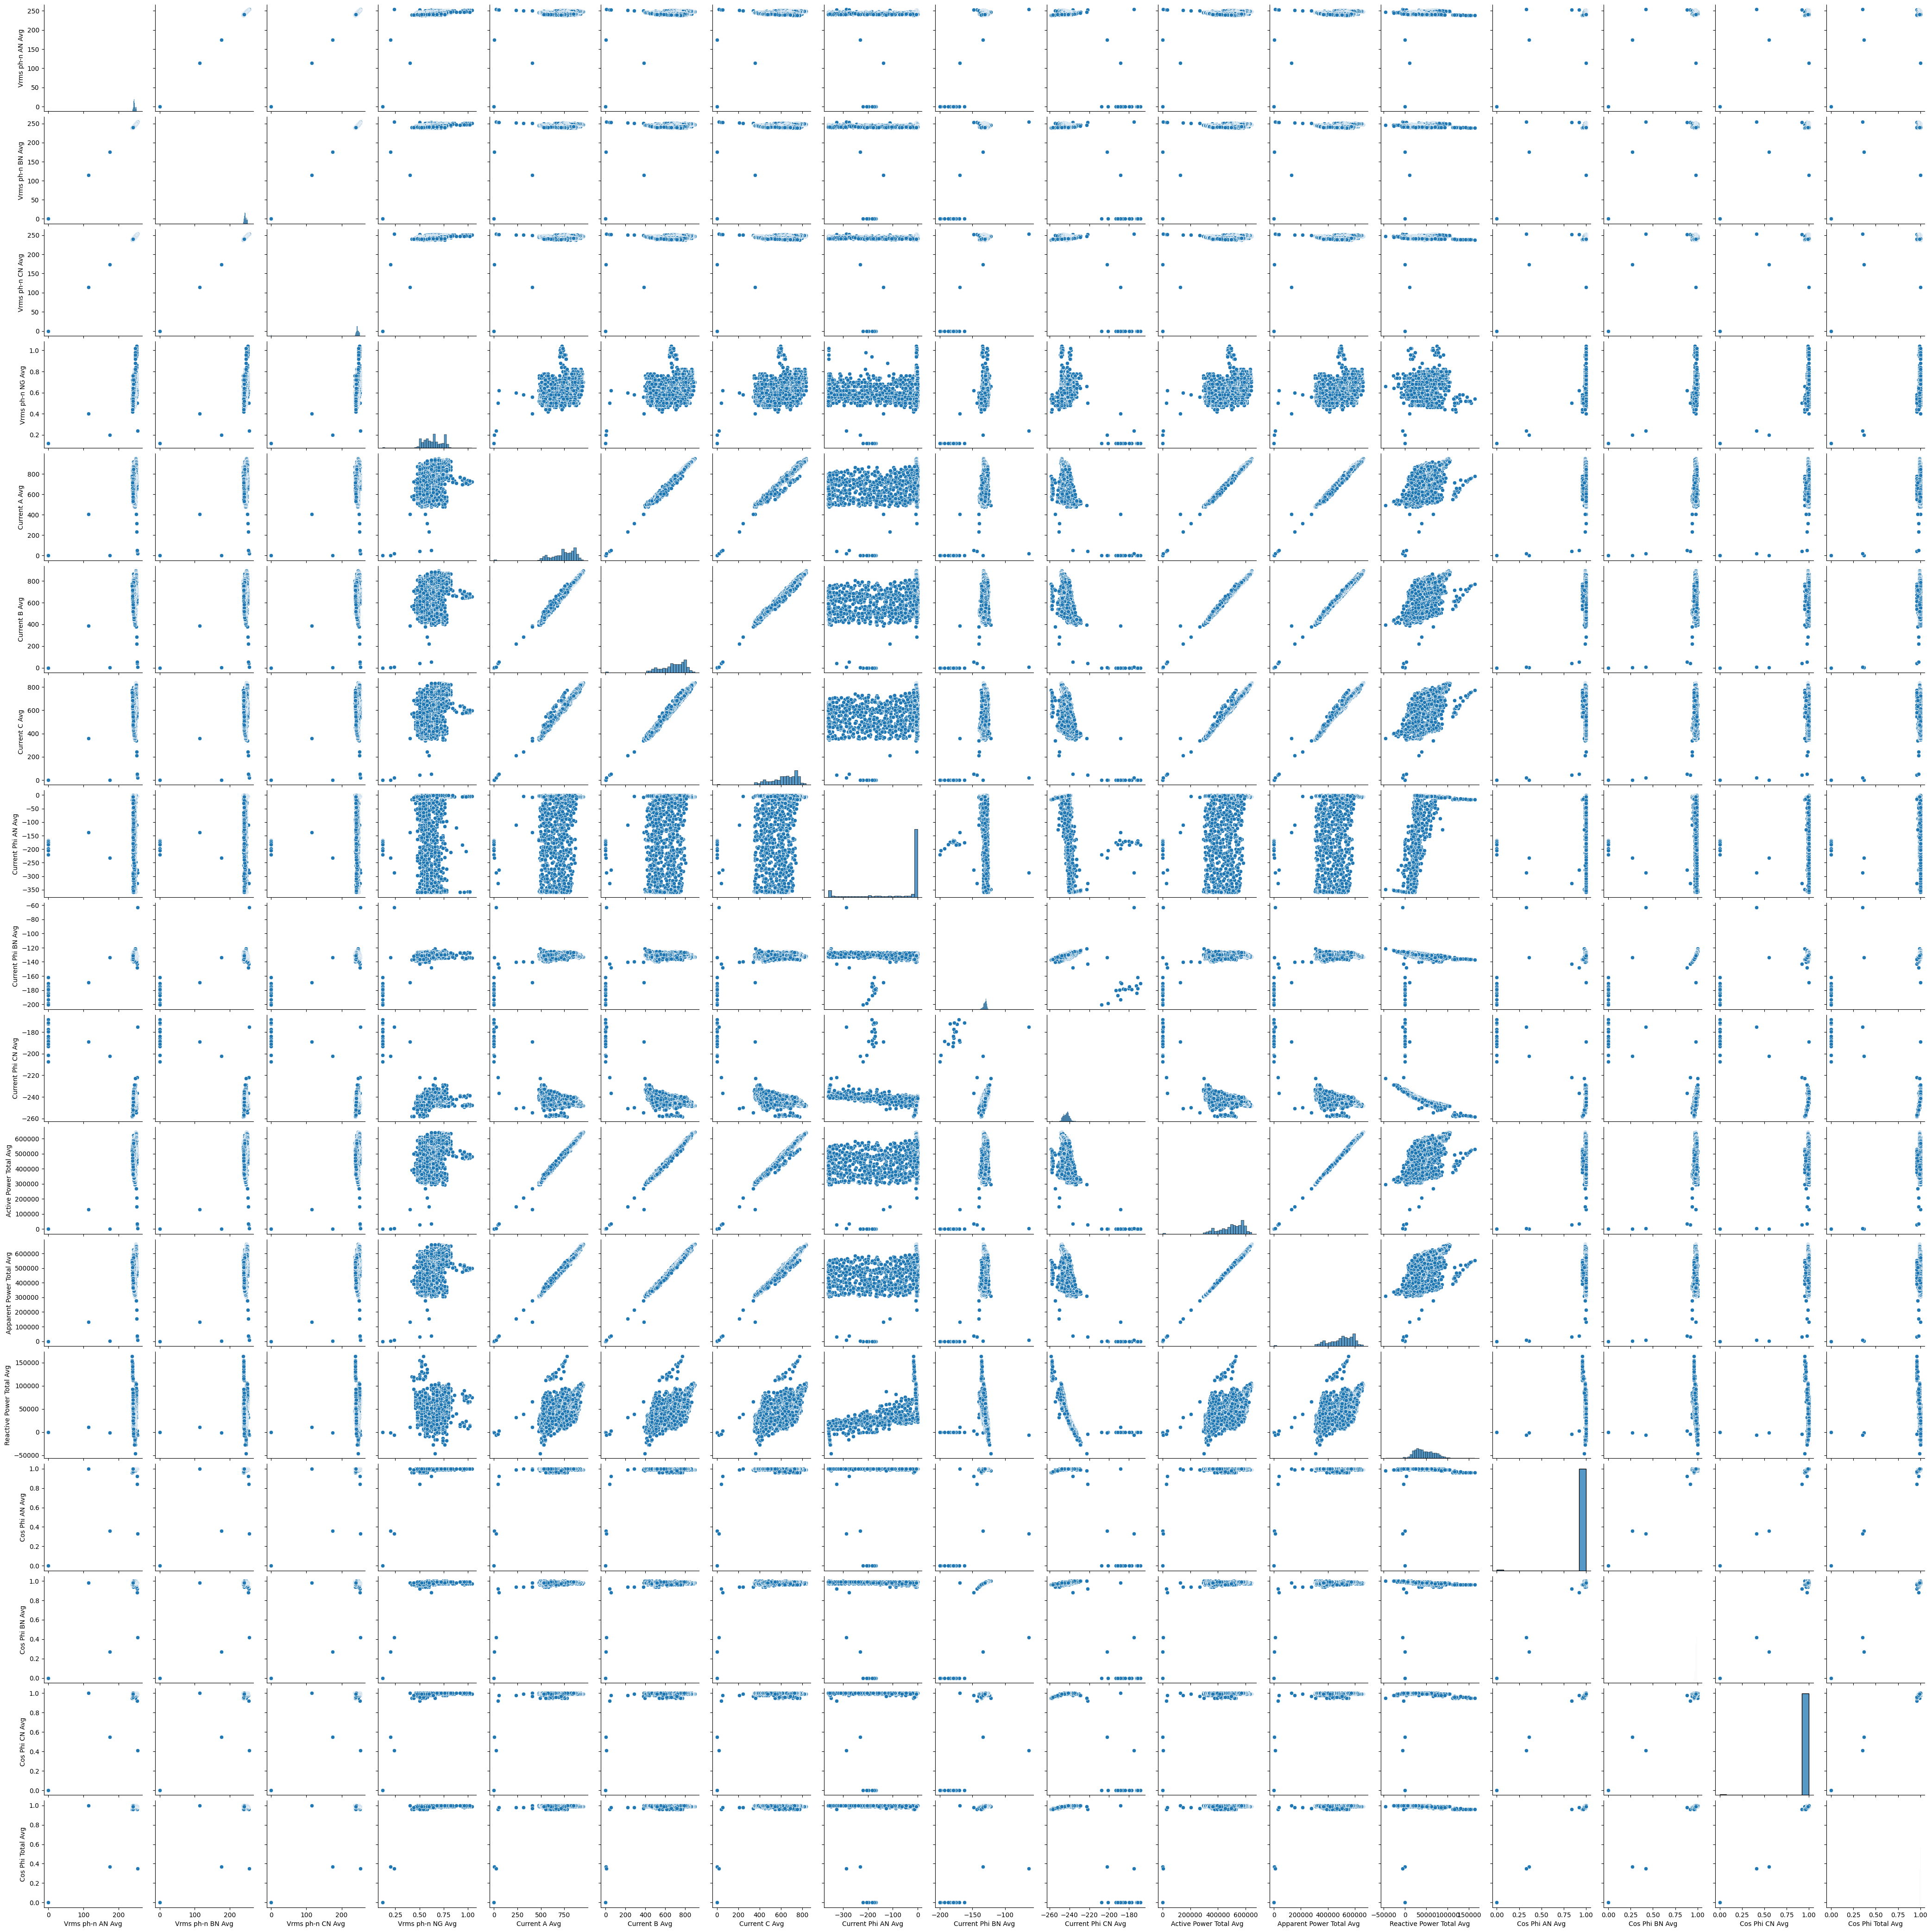

In [20]:
sns.pairplot(final_dataset)

This is tremendously hard to draw a final conclusion from this huge plottings.

But, there are some information we get from this render,that there are several cases where value of two features are linearly proportional with each other where as some from clusters and some are pretty constat.

## Heat Map 

Rendering a heat map from this correlation would reveal better insights.

For this we are going to import **Matplotlib Module** to perform the job.

In [21]:
import matplotlib.pyplot as plt

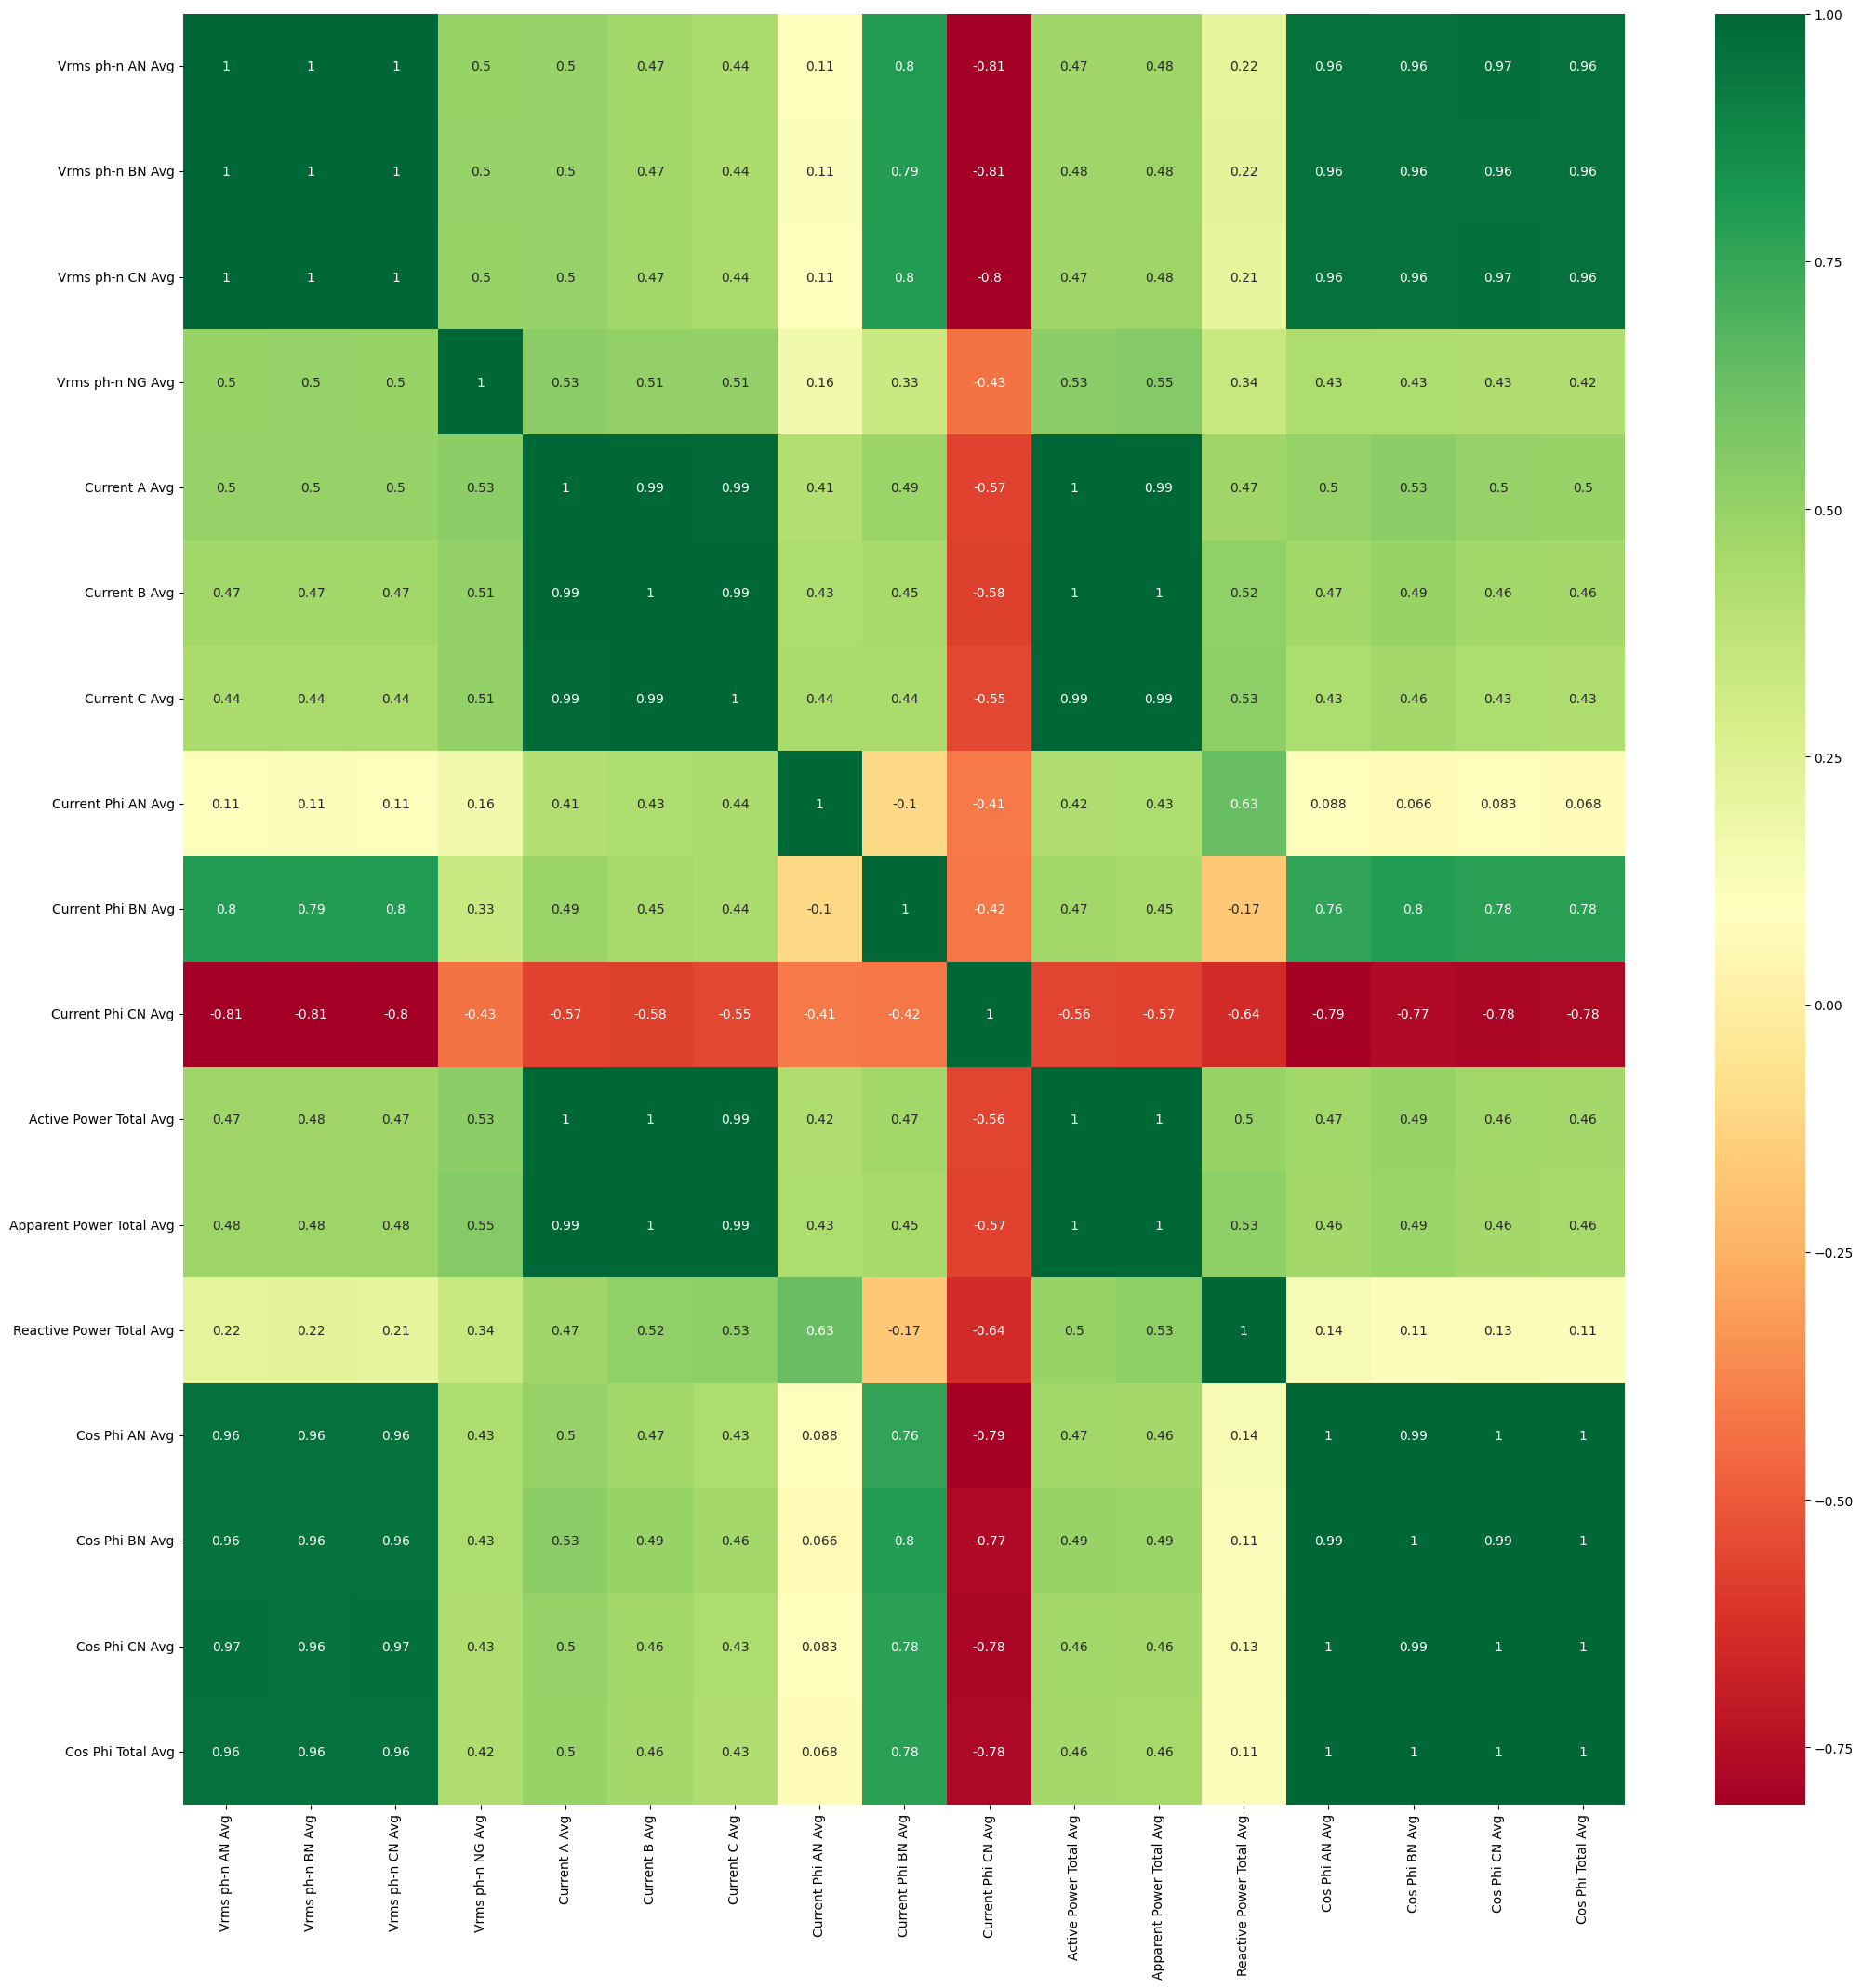

In [22]:
plt.figure(figsize=(25,25))
g=sns.heatmap(final_dataset.corr(),annot=True,cmap='RdYlGn')

We get a better understanding from this heat map. Such as "Vrms ph-n AN Avg" is positively correlated with "Cos Phi Total Avg", similarly "Current Phi CN Avg" is negatively correlated with "Cos Phi Total Avg" and also there are several sections revealing about 0 correlation of "Cos Phi Total Avg" with "Current Phi AN Avg".  

This inspection goes on.In even though there are several sections where correlation is tending to null value but we can not neglect that.Respecting the electrical terminologies we cannot exclude value of a phase. That will leading to missleading interpretation to the users.Hence, we stick to the standard norms.

# Segregation Of Model Into Target And Labels

We are going to segregated the Model into X and y where X holds the lable and y holds the target.

In [23]:
final_dataset.columns

Index(['Vrms ph-n AN Avg', 'Vrms ph-n BN Avg', 'Vrms ph-n CN Avg',
       'Vrms ph-n NG Avg', 'Current A Avg', 'Current B Avg', 'Current C Avg',
       'Current Phi AN Avg', 'Current Phi BN Avg', 'Current Phi CN Avg',
       'Active Power Total Avg', 'Apparent Power Total Avg',
       'Reactive Power Total Avg', 'Cos Phi AN Avg', 'Cos Phi BN Avg',
       'Cos Phi CN Avg', 'Cos Phi Total Avg'],
      dtype='object')

In [24]:
X=final_dataset[['Vrms ph-n AN Avg', 'Vrms ph-n BN Avg', 'Vrms ph-n CN Avg',
       'Vrms ph-n NG Avg', 'Current A Avg', 'Current B Avg', 'Current C Avg',
       'Current Phi AN Avg', 'Current Phi BN Avg', 'Current Phi CN Avg',
       'Active Power Total Avg', 'Apparent Power Total Avg',
       'Reactive Power Total Avg']]

In [25]:
y=final_dataset['Cos Phi Total Avg']

In [26]:
X.head()

,Vrms ph-n AN Avg,Vrms ph-n BN Avg,Vrms ph-n CN Avg,Vrms ph-n NG Avg,Current A Avg,Current B Avg,Current C Avg,Current Phi AN Avg,Current Phi BN Avg,Current Phi CN Avg,Active Power Total Avg,Apparent Power Total Avg,Reactive Power Total Avg
0,242.58,241.98,242.12,0.46,596.0,544.7,496.3,-7.74,-135.90,-248.54,389550,397650,73050
1,242.98,242.34,242.72,0.48,612.5,541.1,494.8,-18.12,-129.90,-240.30,397800,401550,26400
2,243.04,242.18,242.78,0.54,628.3,558.3,508.8,-291.90,-128.06,-238.58,408300,412950,13500
3,242.92,242.06,242.70,0.56,640.2,562.5,510.5,-359.42,-128.70,-238.82,412050,417300,16350
4,242.52,241.62,242.20,0.54,652.7,587.6,533.5,-167.08,-130.62,-242.02,424650,430650,35100


In [27]:
y.head()

0    0.98
1    1.00
2    1.00
3    1.00
4    1.00
Name: Cos Phi Total Avg, dtype: float64

# Model Implementation

**The main focus before doing a model implementaiton is to prevent the over-fitting.For this we will be using Extra Tree Regression algorithm to randomly selection samples to the trees which will prevent the model from getting accustomed with same data casuing over fitting issues.**

We are going to import **Sklearn Module** and implement ExtraTressRegressor.

In [30]:
from sklearn.ensemble import ExtraTreesRegressor

In [31]:
model_EXT=ExtraTreesRegressor()
model_EXT.fit(X,y)

ExtraTreesRegressor()

**Now let us look at some of the important features in this model_EXT**

In [32]:
print(model_EXT.feature_importances_)

[0.1430443  0.12438527 0.19073004 0.22046202 0.03216748 0.05171912
 0.07339781 0.00104234 0.00335597 0.02324573 0.0802522  0.05416215
 0.00203557]


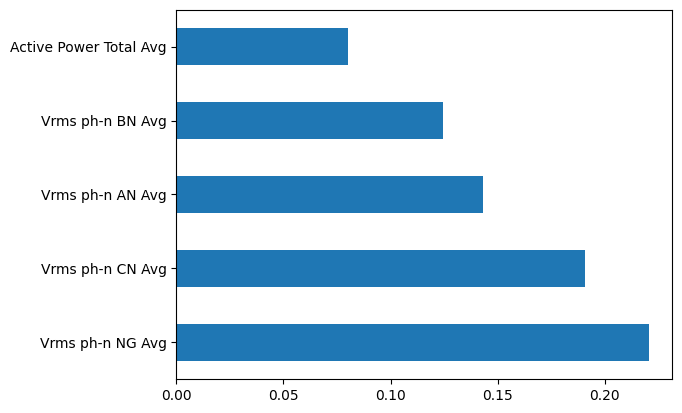

In [33]:
feat_importances=pd.Series(model_EXT.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

From the above plot we can conclude that feature "Vrms ph-n NG Avg" has got the highest importance among all the other features.

## Train Test Split Implementation

Now we are at the verge of putting this dataset into the model before that we must do the Train Test Split,that means we are going to split the labels and the targets into two sections.One section is allocated for training the model and another section is reserved for testing the model after we train it.

*We are spliting 80% to train (pretty sufficient amount to prevent underfitting) and 20% to test the model.*

We are importing train_test_split from sklearn.model_selection module to this job.

In [34]:
from sklearn.model_selection import train_test_split

Let's split X and y into X_train,y_train,X_test and y_test.

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=0)

In [36]:
X_train.head()

,Vrms ph-n AN Avg,Vrms ph-n BN Avg,Vrms ph-n CN Avg,Vrms ph-n NG Avg,Current A Avg,Current B Avg,Current C Avg,Current Phi AN Avg,Current Phi BN Avg,Current Phi CN Avg,Active Power Total Avg,Apparent Power Total Avg,Reactive Power Total Avg
1857,245.48,245.12,245.66,0.58,495.0,429.4,358.9,-240.34,-133.80,-239.02,311100,317550,24450
1198,246.92,246.80,247.10,0.74,820.7,758.7,716.5,-3.86,-130.62,-245.22,552300,567600,62550
1699,248.34,247.96,248.60,0.68,862.3,802.9,758.7,-2.32,-128.90,-243.24,587400,602700,48750
80,239.88,238.98,239.56,0.66,856.5,784.9,745.6,-1.98,-128.08,-242.98,569100,572550,42600
717,242.84,242.68,243.42,0.66,741.4,664.5,622.6,-1.06,-128.96,-241.40,489600,494100,32250


Let us look at the shape of the X_train dataset.

In [37]:
X_train.shape

(1871, 13)

# HpyerParameter Tunning

We are going to implement Random Forest Regressor Model for training this data.Before we do that we are going to tune the parameters present in the RandomForestRegressor() function. To yeild the optimal list of parameters that can be used.

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
rf_random=RandomForestRegressor()

Generally there are several parameters present in the:

RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=1.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
)

We are going to give these parameters like n_estimators,max_features,max_depth,min_samples_split,min_sample_leaf.
Various values to generate the best combination among these and set them in the RandomForestRegressor() model,for better performance.


For this operation we are going to import numpy module to give the hyper-parameters with range of values to tune itself.

In [40]:
import numpy as np

In [41]:
#HyperParameter Tuning
#Number Of tress in random forest
n_estimators=[int(x) for x in np.linspace(100,2000,12)]
#print(n_estimators)
#NUmber Of Features To Consider At Every Split
max_features=['auto','sqrt']
#Maximum Number Of Levels In Tree
max_depth=[int(x) for x in np.linspace(5,30,6)]
#Minimum Number Of Samples Required To Split A Node
min_samples_split=[2,5,10,15,100]
#Minimum Number Of Smaples required At Each Leaf Node
min_samples_leaf=[1,2,5,10]

Now we need to Randomly give these parameter values to the model.For that we are going to use RandomizeSearchCV to do the job because this time lesser time to render the tuned parameter than other modules.

In [42]:
from sklearn.model_selection import RandomizedSearchCV

We have create a dictionary with the key players n_estimators,max_features and so on to set this dictionary into the RandomizedSearchCV() parameters, needed for tunning. 

In [43]:
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 272, 445, 618, 790, 963, 1136, 1309, 1481, 1654, 1827, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


Lets us declear another model from RandomForestRegressor named rf to pass it into the parameter of RandomizedSearchCV()

In [44]:
rf=RandomForestRegressor()

In [45]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_absolute_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

Now we are going to fit the model with tuned parameter generated by the RandomizedSearchCV()

In [46]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1481; total time=   7.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1481; total time=   7.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1481; total time=   6.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1481; total time=   6.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1481; total time=   5.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1827; total time=   7.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1827; total time=   8.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_esti

c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=445; total time=   5.0s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=445; total time=   4.7s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=445; total time=   4.8s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=445; total time=   4.9s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=445; total time=   4.5s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=618; total time=   7.7s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=618; total time=   7.3s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=618; total time=   7.2s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=618; total time=   7.7s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=618; total time=  10.3s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1136; total time=  16.8s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1136; total time=  11.9s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1136; total time=  12.4s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1136; total time=  19.9s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1136; total time=  21.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1654; total time=   9.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1654; total time=   7.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1654; total time=   7.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1654; total time=   7.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1654; total time=   7.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1827; total time=   5.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1827; total time=   5.0s
[CV] END max_depth=5, max_fea

c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1136; total time=  14.7s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1136; total time=  14.6s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1136; total time=  15.5s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1136; total time=  15.4s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1136; total time=  14.7s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 272, 445, 618,
                                                         790, 963, 1136, 1309,
                                                         1481, 1654, 1827,
                                                         2000]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

The RandomForestRegressor model is now tunned.

Now let us the generate some predictions from the model and analyse it with y_test.

In [47]:
pred=rf_random.predict(X_test)

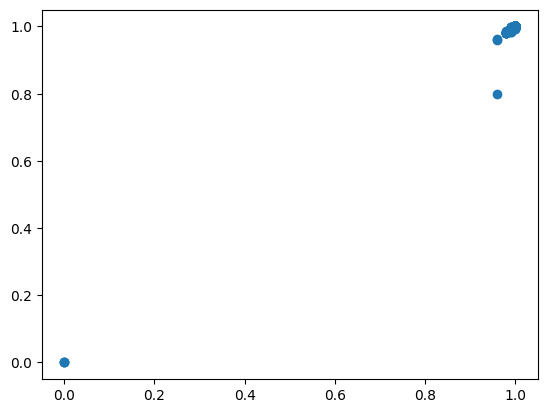

In [48]:
plt.scatter(y_test,pred)

In [49]:
from sklearn.metrics import mean_absolute_error as mae

In [50]:
error=mae(y_test,pred)

In [51]:
print(error)

0.0008975909217766065


As we can see this model has achieved very minimal error. This looks surprising to get such an accuracy.The reason might be power factor "cos phi avg" has very less standard deviation which is tending to zero.

# Check Accuracy For Minimal Features

In [52]:
X2=final_dataset[['Vrms ph-n CN Avg',
'Current C Avg']]

In [53]:
y2=final_dataset['Cos Phi Total Avg']

In [54]:
model_EXT.fit(X2,y2)

ExtraTreesRegressor()

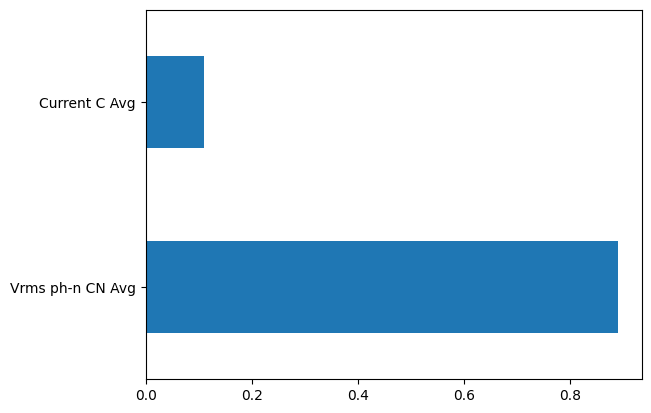

In [55]:
feat_importances=pd.Series(model_EXT.feature_importances_,index=X2.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [56]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,train_size=0.8,random_state=0)

In [57]:
rf_random.fit(X2_train,y2_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1481; total time=   6.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1481; total time=   6.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1481; total time=   6.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1481; total time=   6.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1481; total time=   6.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1827; total time=   9.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1827; total time=   8.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_esti

c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=445; total time=   1.7s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=445; total time=   1.8s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=445; total time=   1.9s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=445; total time=   1.7s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=445; total time=   1.4s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=618; total time=   2.4s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=618; total time=   2.6s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=618; total time=   2.6s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=618; total time=   2.4s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=618; total time=   2.7s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1136; total time=   4.3s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1136; total time=   4.2s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1136; total time=   4.2s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1136; total time=   4.6s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1136; total time=   4.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1654; total time=   5.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1654; total time=   6.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1654; total time=   6.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1654; total time=   4.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1654; total time=   4.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1827; total time=   3.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1827; total time=   3.0s
[CV] END max_depth=5, max_fea

c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1136; total time=   4.6s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1136; total time=   4.3s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1136; total time=   4.3s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1136; total time=   4.7s


c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1136; total time=   4.8s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 272, 445, 618,
                                                         790, 963, 1136, 1309,
                                                         1481, 1654, 1827,
                                                         2000]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [58]:
pred2=rf_random.predict(X2_test)

In [59]:
print(mae(y2_test,pred2))

0.0028615086640107457


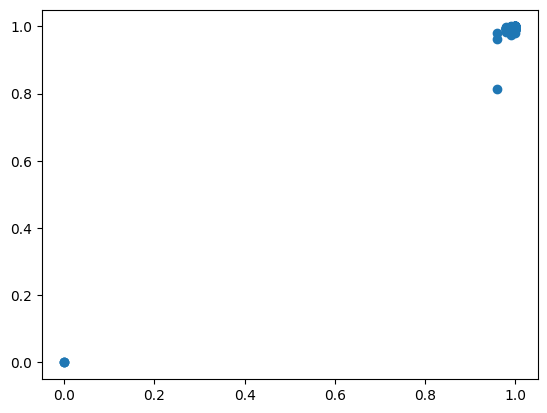

In [60]:
plt.scatter(y2_test,pred2)

In [61]:
X2_train.head()

,Vrms ph-n CN Avg,Current C Avg
1857,245.66,358.9
1198,247.10,716.5
1699,248.60,758.7
80,239.56,745.6
717,243.42,622.6


In [62]:
y2_train.head()

1857    1.00
1198    0.99
1699    1.00
80      1.00
717     1.00
Name: Cos Phi Total Avg, dtype: float64

# Pickling The Model File For Deployment

In [80]:
import pickle

In [81]:
 pickle.dump(rf_random,open('PowerQualityPrediction.pkl','wb'))

In [82]:
pickled_model=pickle.load(open('PowerQualityPrediction.pkl','rb'))

In [83]:
pickled_model.predict(X2_train[0:1].to_numpy().reshape(1,-1))

c:\Users\sankm\OneDrive\Documents\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.99993954])